In [54]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pickle
from session_traces_and_mean import get_all_experimental_records, remove_experiments

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
def get_first_and_last_peaks(mouse, records):
    experiments_to_process = records[(records['mouse_id'] == mouse) & (records['recording_site'] == 'tail')]
    sorted_records = experiments_to_process.sort_values('date').reset_index()
    first_recording = sorted_records.iloc[0]
    last_recording = sorted_records.iloc[-1]
    first_session_peak = get_mean_contra_peak(first_recording)
    last_session_peak = get_mean_contra_peak(last_recording)
    return first_session_peak, last_session_peak

In [56]:
def get_mean_contra_peak(session_record):
    mouse_id = session_record['mouse_id']
    date = session_record['date']
    saving_folder = 'W:\\photometry_2AC\\processed_data\\' + mouse_id + '\\'
    aligned_filename = mouse_id + '_' + date + '_' + 'aligned_traces.p'
    save_filename = saving_folder + aligned_filename
    session_data = pickle.load(open(save_filename, "rb"))
    _trial_peaks = session_data.choice_data.contra_data.trial_peaks
    trial_peaks = [p if not isinstance(p, np.ndarray) else np.nan for p in _trial_peaks]
    mean_peak = np.nanmean(trial_peaks)
    return mean_peak

In [57]:
mice = ['SNL_photo16', 'SNL_photo17']# 'SNL_photo18', 'SNL_photo21', 'SNL_photo22', 'SNL_photo26']
records = get_all_experimental_records()
post_state_change_dates =  ['20200911', '20200915', '20200917', '20200918', '20200921', '20200829', '20200830', '20200831']
records_without_last = remove_experiments(records, {'SNL_photo17': ['20200317'], 'SNL_photo21': ['20200911','20200805', '20200915', '20200917', '20200918', '20200921','20200829', '20200830', '20200831'], 'SNL_photo22': post_state_change_dates, 'SNL_photo26': post_state_change_dates})
first_peaks = []
last_peaks = []
for mouse in mice:
    first, last = get_first_and_last_peaks(mouse, records_without_last)
    first_peaks.append(first)
    last_peaks.append(last)


In [58]:
data = pd.DataFrame({'mouse': mice, 'first session peak mean': first_peaks, 'last session peak mean': last_peaks})

In [59]:
data

,mouse,first session peak mean,last session peak mean
0,SNL_photo16,1.532078,0.864189
1,SNL_photo17,1.881998,0.623680


In [60]:
data.set_index('mouse').T

mouse,SNL_photo16,SNL_photo17
first session peak mean,1.532078,1.881998
last session peak mean,0.864189,0.623680


In [33]:
def francescas_plot(ax, data, show_err_bar=False, mean_linewidth=4, mean_line_color='blue', legend=False):
    """Plot lines for all mice from early to late.
    """
    data.plot(ax=ax, color='gray', legend=False)
    data.mean(1).plot(ax=ax,linewidth=mean_linewidth,color=mean_line_color)

    if show_err_bar:
        yerr = data.std(axis=1)

        plt.errorbar(np.array([0,1]), data.mean(1), yerr, color=mean_line_color, linewidth=4)

    # drop the left and bottom spine for cool looking effect
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


Text(0, 0.5, 'Z-scored fluorescence')

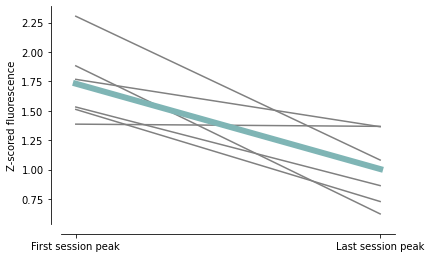

In [52]:
fig, ax = plt.subplots()
francescas_plot(ax, data.set_index('mouse').T, mean_line_color='#7FB5B5', mean_linewidth=6, show_err_bar=False)
plt.xticks([0, 1], ['First session peak', 'Last session peak'])
plt.ylabel('Z-scored fluorescence')

In [49]:
import os

filepath=os.path.join('W:\\photometry_2AC\\plots', 'quantified_peak_change_first_last.pdf' )
fig.savefig(filepath)